# LEGO ANALYSIS

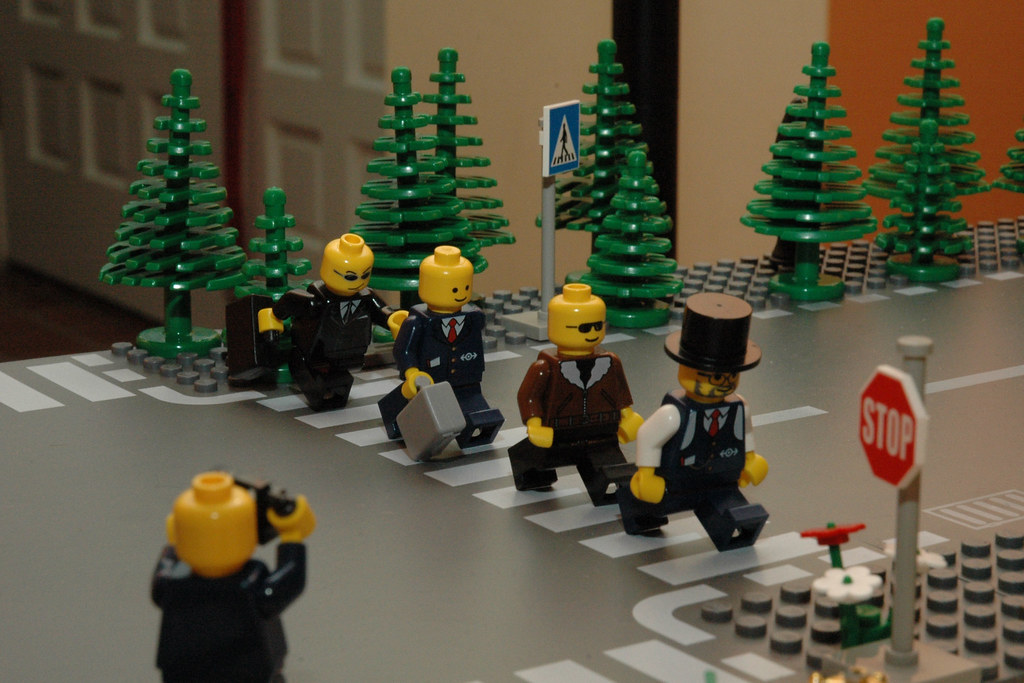

## INTRODUCTION

#### Let's look at Lego sets!

Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in this <a href='https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T'>article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. 

### Exploring the Evolution of Lego!

You are a Data Analyst at Lego working with the Sales/Customer Success teams. The Account Executive responsible for the Star Wars partnership has asked for specific information in preparation for their meeting with the Star Wars team. Although Star Wars was critical to the survival of the brand, Lego has since introduced a wide variety of licensed sets over subsequent years.

There are two questions which need to be answered:

**1. What percentage of all licensed sets ever released were Star Wars themed?** <br>
*Save your answer as a variable ```the_force``` in the form of an integer (e.g. 25).*

**2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)?** <br>
*Save your answer as a variable ```new_era``` in the form of an integer (e.g. 2012).*

Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:

#### datasets/lego_sets.csv
- **set_num:** A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!
- **set_name:** A name for every set in the dataset (note that this can be the same for different sets).
- **year:** The date the set was released.
- **num_parts:** The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.
- **theme_name:** The name of the sub-theme of the set.
- **parent_theme:** The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.

#### datasets/parent_themes.csv**
- **id:** A code that is unique to every theme.
- **name:** The name of the parent theme.
- **is_licensed:** A Boolean column specifying whether the theme is a licensed theme.

From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!

In [25]:
#imports
import pandas as pd

In [26]:
#import data
df = pd.read_csv('datasets/lego_sets.csv')
theme = pd.read_csv('datasets/parent_themes.csv')

**df**

In [27]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


**theme**

In [28]:
theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [30]:
#merging datasets on theme
merged = df.merge(theme, left_on='parent_theme', right_on='name')
merged.drop(columns='name_y', inplace=True)
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [43]:
# Finding null values in set_num
pd.isnull(merged["set_num"]).count()

11986

In [44]:
licensed = merged[merged['is_licensed']]
licensed = licensed.dropna(subset=['set_num'])
licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [45]:
star_wars = licensed[licensed['parent_theme']=='Star Wars']
star_wars.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [46]:
star_wars.shape

(609, 8)

### Question 1 answer

In [47]:
the_force = int((star_wars.shape[0]/licensed.shape[0])*100)
print(the_force)

51


In [54]:
licensed_sorted = licensed.sort_values('year')
summed_df = licensed_sorted.groupby(['year','parent_theme']).sum('is_licensed').reset_index()
summed_df.head(10)

,year,parent_theme,num_parts,id,is_licensed
0,1999,Star Wars,1384.0,2054,13
1,2000,Disney's Mickey Mouse,405.0,1940,5
2,2000,Star Wars,2580.0,4108,26
3,2001,Harry Potter,1284.0,2706,11
4,2001,Star Wars,2949.0,2212,14
5,2002,Harry Potter,1397.0,4674,19
6,2002,Star Wars,4735.0,4424,28
7,2002,Super Heroes,333.0,1446,3
8,2003,Harry Potter,0.0,738,3
9,2003,Star Wars,6660.0,5056,32


In [63]:
max_df = summed_df.sort_values('is_licensed', ascending=False).drop_duplicates(['year'])
max_df.sort_values('year', inplace=True)
max_df

,year,parent_theme,num_parts,id,is_licensed
0,1999,Star Wars,1384.0,2054,13
2,2000,Star Wars,2580.0,4108,26
4,2001,Star Wars,2949.0,2212,14
6,2002,Star Wars,4735.0,4424,28
9,2003,Star Wars,6660.0,5056,32
12,2004,Star Wars,1659.0,3160,20
16,2005,Star Wars,4730.0,4424,28
20,2006,Star Wars,2769.0,1738,11
24,2007,Star Wars,11361.0,2528,16
28,2008,Star Wars,6865.0,3634,23


### Question 2 answer

In [67]:
new_era = int(max_df['year'].loc[max_df['parent_theme'] != 'Star Wars'].dropna())
new_era

2017